In [1]:
# importing the needed libraries

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

## 1. Importing all DFs

In [2]:
df_10 = pd.read_excel("combined\\combined 2010 ZRH.xlsx")
df_11 = pd.read_excel("combined\\combined 2011 ZRH.xlsx")
df_12 = pd.read_excel("combined\\combined 2012 ZRH.xlsx")
df_13 = pd.read_excel("combined\\combined 2013 ZRH.xlsx")
df_14 = pd.read_excel("combined\\combined 2014 ZRH.xlsx")
df_15 = pd.read_excel("combined\\combined 2015 ZRH.xlsx")
df_16 = pd.read_excel("combined\\combined 2016 ZRH.xlsx")
df_17 = pd.read_excel("combined\\combined 2017 ZRH.xlsx")
df_18 = pd.read_excel("combined\\combined 2018 ZRH.xlsx")

all_df = [df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18]

In [3]:
# to get a general feeling about the DFs

for single_df in all_df:
    print(len(single_df))
    print(single_df.columns)
    print(single_df.head())

21
Index(['Unnamed: 0', 'Verwaltungsrechnung gesamt', 'R 2009', 'B 2010',
       'ZK 2010', 'R 2010', 'Anteil'],
      dtype='object')
   Unnamed: 0         Verwaltungsrechnung gesamt   R 2009   B 2010  ZK 2010   
0           0                 30 Personalaufwand  2'425.8  2'480.2     23.1  \
1           1                     31 Sachaufwand  1'660.9  1'780.5     12.1   
2           2                    32 Passivzinsen    177.6    181.1      NaN   
3           3                  33 Abschreibungen    600.4    645.2      2.4   
4           4  35 Entschädigungen an Gemeinwesen    190.0    192.4      NaN   

    R 2010 Anteil  
0  2'492.4  32.1%  
1  1'677.7  21.6%  
2    191.4   2.5%  
3    585.5   7.5%  
4    194.2   2.5%  
21
Index(['Unnamed: 0', 'Verwaltungsrechnung gesamt', 'R 2010', 'B 2011',
       'ZK 2011', 'R 2011', 'Anteil'],
      dtype='object')
   Unnamed: 0         Verwaltungsrechnung gesamt   R 2010   B 2011  ZK 2011   
0           0                 30 Personalaufwand  2'492.

#### The index got imported as a new column ("Unnamed: 0) -> let's get rid of it & rename "Verwaltungsrechnung gesamt" to "Konto"

In [4]:
for single_df in all_df:
    single_df.drop(columns=['Unnamed: 0'], inplace=True)
    single_df.rename(columns={"Verwaltungsrechnung gesamt":"Konto"}, inplace=True)

#### Let's ensure that all DFs have the same columns and row length

## 2. Cross check of potential errors (missing rows or columns)

In [5]:
df_10

,Konto,R 2009,B 2010,ZK 2010,R 2010,Anteil
0,30 Personalaufwand,2'425.8,2'480.2,23.1,2'492.4,32.1%
1,31 Sachaufwand,1'660.9,1'780.5,12.1,1'677.7,21.6%
2,32 Passivzinsen,177.6,181.1,NaN,191.4,2.5%
3,33 Abschreibungen,600.4,645.2,2.4,585.5,7.5%
4,35 Entschädigungen an Gemeinwesen,190.0,192.4,NaN,194.2,2.5%
5,36 Eigene Beiträge,1'263.0,1'312.3,20.0,1'350.9,17.4%
6,37 Durchlaufende Beiträge,105.4,95.4,0.3,98.8,1.3%
7,38 Einlagen in Spezialfinanzierungen,565.5,208.7,NaN,235.0,3.0%
8,39 Interne Verrechnungen,959.8,950.8,1.0,945.0,12.2%
9,Aufwand gesamt,7'948.3,7'846.6,58.9,7'770.9,100.0%


In [6]:
# base values against which to check all columns

year = 0

df_base_cols = ["Konto", f"R {year - 1}", f"B {year}", f"ZK {year}", f"R {year}", "Anteil"]
df_base_len = len(df_10)

In [7]:
year = 10

for single_df in all_df:
    # if df_base_cols != single_df.columns:
    if all(x == y for x, y in zip(df_base_cols, single_df.columns)):
        # all(x == y for x, y in zip(test_list1, test_list2))
        print(f"Columns wrong {single_df}")
    if len(single_df) != df_base_len:
        print(f"{single_df} is missing some entries")
    
    year += 1

#### No output, meaning all DFs have the same lengths and the correct columns

## 3. Combination

#### To combine them, let's add a column in the end saying the year of the DF and rename the columns to "Konto", "R J - 1", "B J", "ZK J", "R J", "Anteil", "Jahr"

In [8]:
year = 2010
concat_columns = ["Konto", "R J - 1", "B J", "ZK J", "R J", "Anteil", "Jahr"]

for single_df in all_df:
    single_df["Jahr"] = year
    single_df.columns = concat_columns
    year += 1

In [9]:
# combining them all

df_concat = pd.concat(all_df)

In [10]:
df_concat

,Konto,R J - 1,B J,ZK J,R J,Anteil,Jahr
0,30 Personalaufwand,2'425.8,2'480.2,23.1,2'492.4,32.1%,2010
1,31 Sachaufwand,1'660.9,1'780.5,12.1,1'677.7,21.6%,2010
2,32 Passivzinsen,177.6,181.1,NaN,191.4,2.5%,2010
3,33 Abschreibungen,600.4,645.2,2.4,585.5,7.5%,2010
4,35 Entschädigungen an Gemeinwesen,190.0,192.4,NaN,194.2,2.5%,2010
...,...,...,...,...,...,...,...
16,46 Beiträge für eigene Rechnung,-1'031.0,-900.0,NaN,-909.7,10.1%,2018
17,47 Durchlaufende Beiträge,-45.0,-28.4,NaN,-39.6,0.4%,2018
18,48 Entnahmen aus Spezialfinanzierungen,-87.3,-42.8,NaN,-37.6,0.4%,2018
19,49 Interne Verrechnungen,-962.7,-992.0,NaN,-963.6,10.8%,2018


In [11]:
# replacing NaNs with 0 -> needed for later calcultations
df_concat.fillna(0, inplace=True)

In [12]:
# df_concat[df_concat["ZK J"].notna()]["ZK J"].apply(lambda x: str(x).replace("'", ""))

#### Let's get rid of all the apostrophy signs, %s and neagtive signs

In [13]:
df_concat["B J"] = df_concat["B J"].apply(lambda x: str(x).replace("'", "").replace("-", ""))
df_concat["R J - 1"] = df_concat["R J - 1"].apply(lambda x: str(x).replace("'", "").replace("-", ""))
df_concat["ZK J"] = df_concat["ZK J"].apply(lambda x: str(x).replace("'", "").replace("-", ""))
df_concat["R J"] = df_concat["R J"].apply(lambda x: str(x).replace("'", "").replace("-", ""))
df_concat["Anteil"] = df_concat["Anteil"].apply(lambda x: str(x).replace("%", ""))
df_concat.rename(columns={"Anteil":"Anteil in %"}, inplace=True)

#### Let's sum up the column "ZK J" with "B J" and get rid of it

In [14]:
df_concat["B J"] = df_concat["B J"].astype(float) + df_concat["ZK J"].astype(float)
df_concat.drop("ZK J", axis=1, inplace=True)


In [15]:
df_concat

,Konto,R J - 1,B J,R J,Anteil in %,Jahr
0,30 Personalaufwand,2425.8,2503.3,2492.4,32.1,2010
1,31 Sachaufwand,1660.9,1792.6,1677.7,21.6,2010
2,32 Passivzinsen,177.6,181.1,191.4,2.5,2010
3,33 Abschreibungen,600.4,647.6,585.5,7.5,2010
4,35 Entschädigungen an Gemeinwesen,190.0,192.4,194.2,2.5,2010
...,...,...,...,...,...,...
16,46 Beiträge für eigene Rechnung,1031.0,900.0,909.7,10.1,2018
17,47 Durchlaufende Beiträge,45.0,28.4,39.6,0.4,2018
18,48 Entnahmen aus Spezialfinanzierungen,87.3,42.8,37.6,0.4,2018
19,49 Interne Verrechnungen,962.7,992.0,963.6,10.8,2018


#### Let's see the values of the column "Konto"

In [16]:
VR = df_concat["Konto"].unique()
VR

array(['30 Personalaufwand', '31 Sachaufwand', '32 Passivzinsen',
       '33 Abschreibungen', '35 Entschädigungen an Gemeinwesen',
       '36 Eigene Beiträge', '37 Durchlaufende Beiträge',
       '38 Einlagen in Spezialfinanzierungen', '39 Interne Verrechnungen',
       'Aufwand gesamt', '40 Steuern', '41 Regalien Konzessionen',
       '42 Vermögenserträge', '43 Entgelte',
       '44 Anteile und Beiträge ohne Zweckb.',
       '45 Rückerstattungen von Gemeinwesen',
       '46 Beiträge für eigene Rechnung', '47 Durchlaufende Beiträge',
       '48 Entnahmen aus Spezialfinanzierungen',
       '49 Interne Verrechnungen', 'Ertrag gesamt neu'], dtype=object)

## 4. Adding the data that got not properly read through tabula (reports 2019-2022)

#### This data got copy pasted manually into the Excel file. The next step is to read it to combine it

In [17]:
df_missing = pd.read_excel("missing Zurich.xlsx")

In [18]:
df_missing

,Konto,B J,ZK J,R J,Jahr
0,Aufwand,8 755 767 200,33 201 000,8 693 232 040.90,2019
1,Ertrag,8 794 954 100,NaN,8 944 582 343.41,2019
2,Aufwand,8 949 597 000,88 903 100,8 802 326 259.00,2020
3,Ertrag,8 976 743 000,NaN,8 849 375 525.07,2020
4,Aufwand,9 134 100 900,51 593 400,9 301 372 001.73,2021
5,Ertrag,8 948 675 900,NaN,9 413 871 227.90,2021
6,Aufwand,9 573 734 000,91 653 400,9 964 156 845.64,2022
7,Ertrag,9 381 681 700,NaN,10 261 323 696.34,2022


#### In order to combine the df_missing (cointaining the years 2019-2022) with df_concat (the other years), they need to have the same structure.

#### The values are not expressed in millions (as was the case for the values in df_concat). Additionally the values contain 0s, which have to be removed for calculation purposes. The column "ZK J" needs to be summed up with "B J" and we need to get rid of it. Let's fix that all

In [19]:
# replacing NaNs with 0 -> needed for later calcultations
df_missing.fillna(0, inplace=True)

In [20]:
df_missing["B J"] = df_missing["B J"].apply(lambda x: str(x).replace(" ", "")).apply(lambda x: round(float(x)/1000000, 1))
df_missing["ZK J"] = df_missing["ZK J"].apply(lambda x: str(x).replace(" ", "")).apply(lambda x: round(float(x)/1000000, 1))
df_missing["R J"] = df_missing["R J"].apply(lambda x: str(x).replace(" ", "")).apply(lambda x: round(float(x)/1000000, 1))

In [21]:
df_missing["B J"] = df_missing["B J"].astype(float) + df_missing["ZK J"].astype(float)
df_missing.drop("ZK J", axis=1, inplace=True)


In [22]:
df_missing

,Konto,B J,R J,Jahr
0,Aufwand,8789.0,8693.2,2019
1,Ertrag,8795.0,8944.6,2019
2,Aufwand,9038.5,8802.3,2020
3,Ertrag,8976.7,8849.4,2020
4,Aufwand,9185.7,9301.4,2021
5,Ertrag,8948.7,9413.9,2021
6,Aufwand,9665.4,9964.2,2022
7,Ertrag,9381.7,10261.3,2022


#### We also need to remove all rows that do not belong to the total "Aufwand" and "Ertrag" and keep the relevant columns in the dataframe we had before (years 2010-2018)

In [23]:
# keeping the rows that only contain total incomes and expenses & only the relevant columns
df_concat_temp = df_concat[df_concat["Konto"].isin(["Ertrag gesamt neu", "Aufwand gesamt"])][["Konto", "B J", "R J", "Jahr"]].copy()

In [24]:
# renaming content of the Konto column
df_concat_temp["Konto"] = df_concat_temp["Konto"].apply(lambda x: x.replace("Aufwand gesamt", "Aufwand").replace("Ertrag gesamt neu", "Ertrag"))

In [25]:
df_concat_temp

,Konto,B J,R J,Jahr
9,Aufwand,7905.5,7770.9,2010
20,Ertrag,7630.0,7714.7,2010
9,Aufwand,7978.5,7849.7,2011
20,Ertrag,7922.0,7843.9,2011
9,Aufwand,989.7,945.6,2012
20,Ertrag,8378.9,8298.0,2012
9,Aufwand,896.6,883.6,2013
20,Ertrag,8262.5,8228.7,2013
9,Aufwand,926.9,895.7,2014
20,Ertrag,8229.8,8484.6,2014


#### Concatenation

In [26]:
df_simple = pd.concat((df_concat_temp, df_missing))

In [27]:
df_simple.reset_index(drop=True, inplace=True)

In [28]:
df_simple

,Konto,B J,R J,Jahr
0,Aufwand,7905.5,7770.9,2010
1,Ertrag,7630.0,7714.7,2010
2,Aufwand,7978.5,7849.7,2011
3,Ertrag,7922.0,7843.9,2011
4,Aufwand,989.7,945.6,2012
5,Ertrag,8378.9,8298.0,2012
6,Aufwand,896.6,883.6,2013
7,Ertrag,8262.5,8228.7,2013
8,Aufwand,926.9,895.7,2014
9,Ertrag,8229.8,8484.6,2014


In [29]:
df_simple[df_simple["Konto"] == "Aufwand"]

,Konto,B J,R J,Jahr
0,Aufwand,7905.5,7770.9,2010
2,Aufwand,7978.5,7849.7,2011
4,Aufwand,989.7,945.6,2012
6,Aufwand,896.6,883.6,2013
8,Aufwand,926.9,895.7,2014
10,Aufwand,932.6,914.8,2015
12,Aufwand,926.8,890.5,2016
14,Aufwand,990.2,962.7,2017
16,Aufwand,993.0,963.6,2018
18,Aufwand,8789.0,8693.2,2019


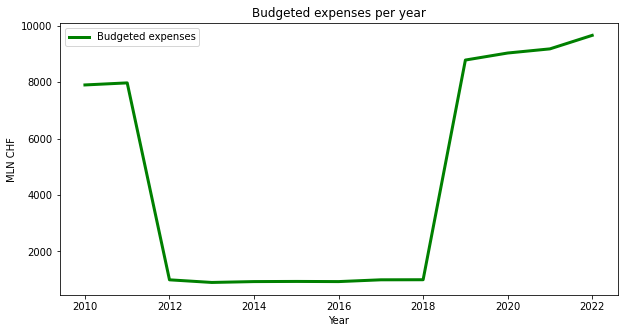

In [30]:
fig, ax = plt.subplots(figsize=(10,5))                        
ax.plot(df_simple[df_simple["Konto"] == "Aufwand"]["Jahr"], \
        df_simple[df_simple["Konto"] == "Aufwand"]["B J"], color="green", linewidth=3, label="Budgeted expenses")

ax.set_title("Budgeted expenses per year")
ax.set_xlabel("Year")
ax.set_ylabel("MLN CHF")
ax.legend()
plt.show()

#### The budgeted expenses seem to be abnormally low between year 2012 and 2018. Let's compare the finalized report from Zurich 2012 with the orginal PDF.

In [31]:
df_concat[df_concat["Jahr"] == 2012]

,Konto,R J - 1,B J,R J,Anteil in %,Jahr
0,30 Personalaufwand,2493.4,2680.8,2620.1,31.4,2012
1,31 Sachaufwand,1579.0,1800.2,1611.3,19.3,2012
2,32 Passivzinsen,193.0,196.7,199.9,2.4,2012
3,33 Abschreibungen,581.6,629.2,586.8,7.0,2012
4,35 Entschädigungen an Gemeinwesen,0,269.5,269.5,3.2,2012
5,36 Eigene Beiträge,196.8,209.9,212.9,2.6,2012
6,37 Durchlaufende Beiträge,1487.6,1473.7,1461.6,17.5,2012
7,38 Einlagen in Spezialfinanzierungen,109.6,82.0,167.1,2.0,2012
8,39 Interne Verrechnungen,267.8,107.8,256.5,3.1,2012
9,Aufwand gesamt,940.9,989.7,945.6,11.4,2012


#### Seing that the data got wrongly read, due to "Konto" values being written in two lines in the original PDF, we conclude that using Tabula is very unreliable for our case. This obliges us to enter the entire data manually and use this for our machine learning setup. Given the tediousness and error proneness of the work, only the total expenses and total incomes (column Konto) will be added